# **Prediksi Rating Usia Film Indonesia Menggunakan Metode Machine Learning Berbasis CRISP-DM**

## 3KA25
### Nama Anggota Kelompok:
1. Amara Luthfi Vannesa  (10122148)
2. Danty Zahra Nadhira   (10122329)
3. Rosa Linda Salsabila  (11122313)

## Tujuan Analisis:
Proyek ini bertujuan membangun model prediktif untuk memperkirakan rating pengguna film Indonesia berdasarkan fitur seperti genre, tahun rilis, dan durasi. Dengan pendekatan CRISP-DM, hasil analisis ini diharapkan membantu industri perfilman dalam memahami preferensi penonton dan mendukung pengambilan keputusan produksi.

## Sumber Dataset:
Kaggle - https://www.kaggle.com/datasets/dionisiusdh/imdb-indonesian-movies

# Business Understanding

**Tujuan:**

Dalam industri perfilman, memahami preferensi penonton menjadi kunci untuk menciptakan konten yang sukses. Salah satu indikator preferensi tersebut adalah rating pengguna yang diberikan melalui platform online seperti IMDb. Rating ini merepresentasikan tingkat kepuasan penonton terhadap suatu film.

Proyek ini bertujuan untuk membangun model prediktif yang dapat memperkirakan rating pengguna berdasarkan informasi awal film seperti genre, durasi, tahun rilis, dan metadata lainnya. Dengan pendekatan berbasis CRISP-DM, proyek ini memberikan pemahaman mendalam terhadap data film Indonesia dan mengembangkan solusi berbasis machine learning untuk mendukung pengambilan keputusan produksi.

**Manfaat bisnis yang ingin dicapai:**

*   Memberikan wawasan mengenai faktor-faktor yang memengaruhi rating pengguna.
*   Membantu rumah produksi dan distributor film dalam merancang konten yang lebih disukai penonton.
*   Menyediakan sistem pendukung keputusan berbasis data untuk perencanaan dan investasi film di masa depan.




# Data Understanding

In [ ]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Membaca file CSV dari direktori lokal
df = pd.read_csv('indonesian_movies (1).csv')

# Menampilkan DataFrame
print(df)

                         title  year  \
0          #FriendButMarried 2  2020   
1                     4 Mantan  2020   
2     Aku Tahu Kapan Kamu Mati  2020   
3                  Anak Garuda  2020   
4                    Dignitate  2020   
...                        ...   ...   
1267     The Tiger from Tjampa  1953   
1268       Enam Djam di Djogja  1951   
1269             Darah dan Doa  1950   
1270         Resia Boroboedoer  1928   
1271        Loetoeng Kasaroeng  1926   

                                            description      genre rating  \
0     Ayudia (Mawar De Jongh) is not satisfied enoug...  Biography    13+   
1     Sara, Airin, Rachel, and Amara were accidental...   Thriller    17+   
2     After apparent death, Siena is able to see sig...     Horror    13+   
3     Good Morning Indonesia, a school for poor orph...  Adventure    13+   
4     Alfi (Al Ghazali) meets Alana (Caitlin Halderm...      Drama    17+   
...                                                 ...  

In [ ]:
# Cek kolom, tipe data, dan missing values
df.info()

# Cek statistik deskriptif semua field
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
count,1272,1272.000000,840,1236,376,1272.000000,1272,1272,1265,1272,869
unique,1262,NaN,840,15,11,NaN,312,8,377,1266,85
top,Arini,NaN,It tells the story of an Indonesian revolution...,Drama,13+,NaN,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,2,NaN,1,456,161,NaN,58,1241,61,4,109
mean,NaN,2007.023585,NaN,NaN,NaN,6.144418,NaN,NaN,NaN,NaN,NaN
std,NaN,12.968560,NaN,NaN,NaN,1.389315,NaN,NaN,NaN,NaN,NaN
min,NaN,1926.000000,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cek nilai kosong
df.isnull().sum()

,0
title,0
year,0
description,432
genre,36
rating,896
users_rating,0
votes,0
languages,0
directors,7
actors,0


## **Univariat**

Histogram

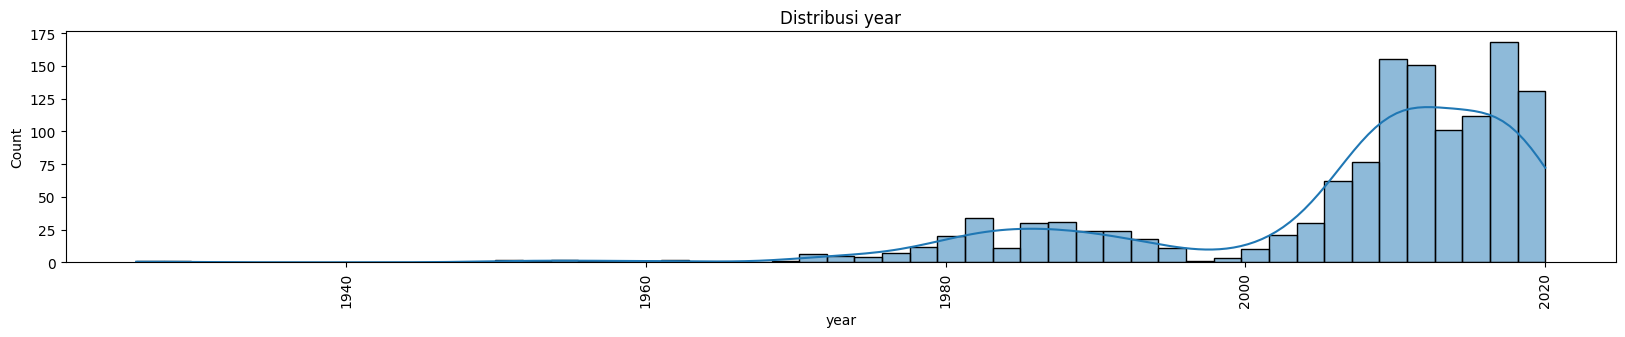

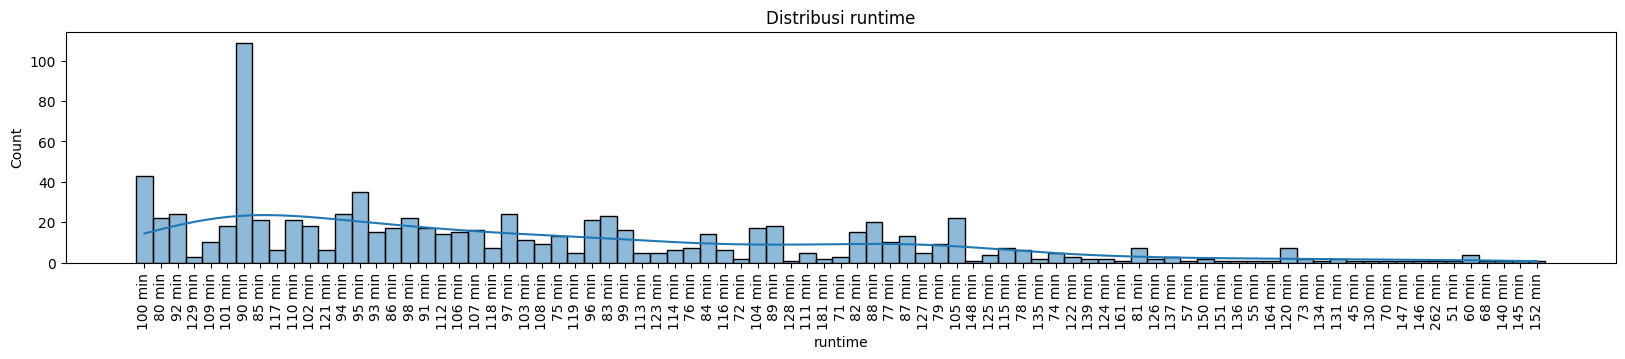

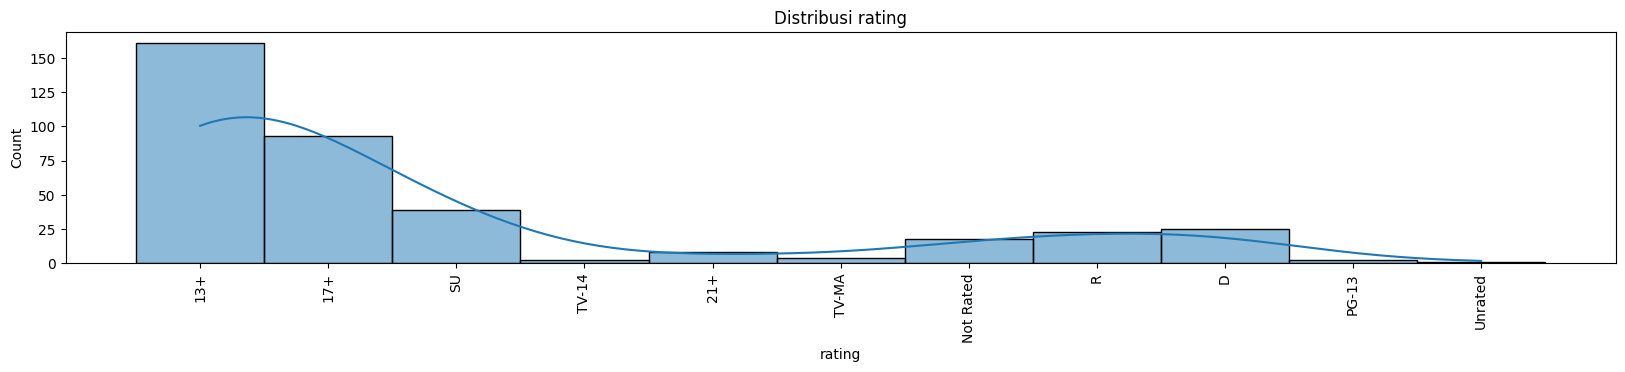

In [ ]:
numerik = ['year', 'runtime', 'rating']
for col in numerik:
    plt.figure(figsize=(20, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=90, fontsize=10)
    plt.show()

## INSIGHT
 1.  film setelah tahun 2000 memiliki lonjakan yang tajam, menunjukkan bahwa industri film menjadi semakin produktif di era modern.
 2.Film dengan panjang sekitar 90 menit lebih banyak diminati.
 3. sebagian besar film ditujukan untuk penonton usia 13 tahun ke atas.

Boxplot

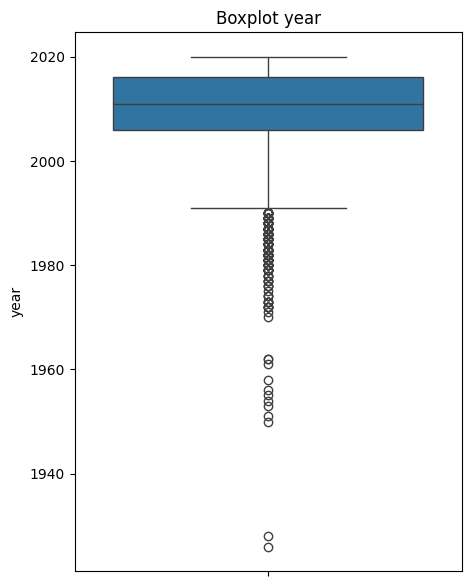

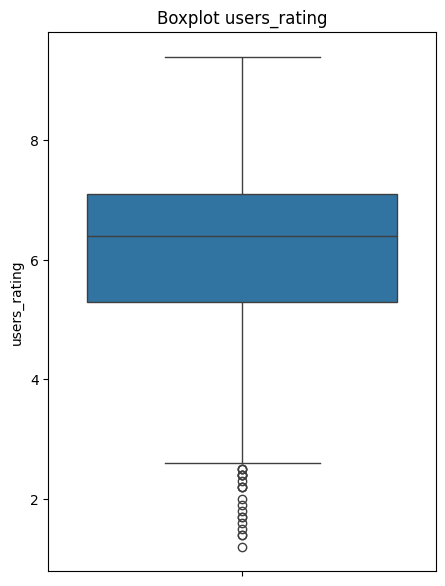

In [ ]:
# Definisikan kolom numerik
numerik = ['year', 'users_rating']

# Looping untuk buat boxplot
for col in numerik:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

## INSIGHT

1. Mayoritas film dirilis pada rentang tahun 1990 hingga 2020.
2. Sebagian besar nilai users_rating berada di antara angka 6 hingga 8.
3. Distribusi users_rating relatif seimbang tanpa banyak nilai ekstrem tinggi.

## **Bivariat**

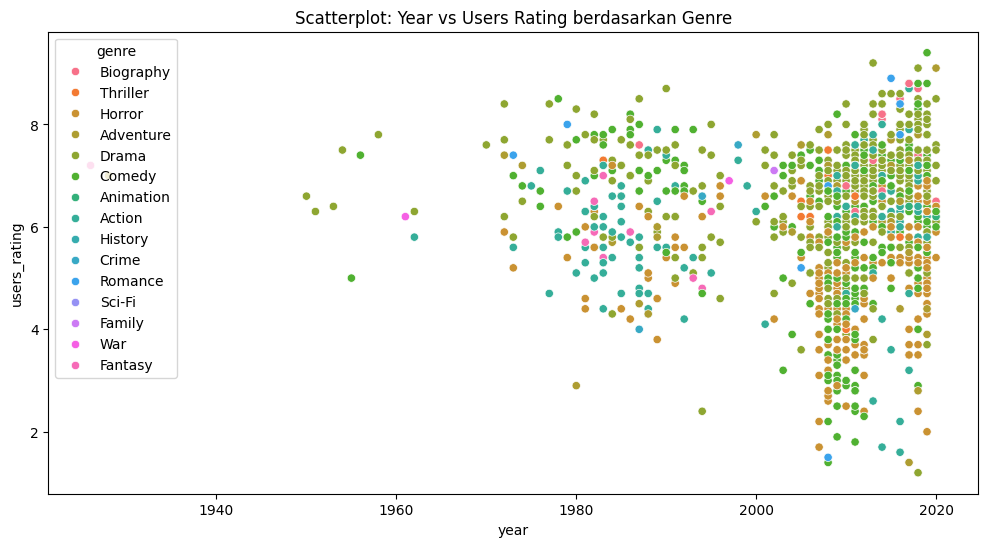

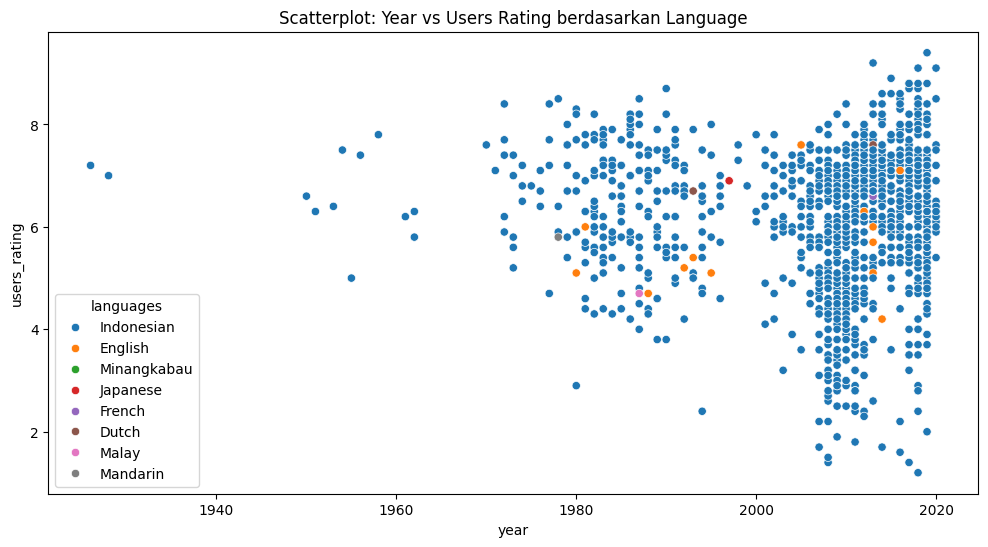

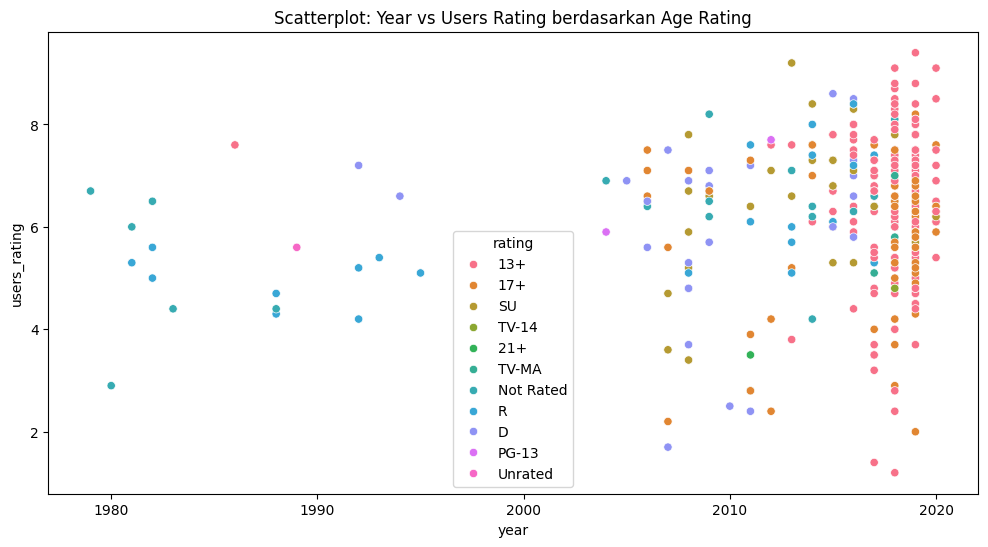

In [ ]:
# Scatterplot Year vs Users Rating hue Genre
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='users_rating', hue='genre')
plt.title('Scatterplot: Year vs Users Rating berdasarkan Genre')
plt.show()

# Scatterplot Year vs Users Rating hue Language
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='users_rating', hue='languages')
plt.title('Scatterplot: Year vs Users Rating berdasarkan Language')
plt.show()

# Scatterplot Year vs Users Rating hue Age Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='users_rating', hue='rating')
plt.title('Scatterplot: Year vs Users Rating berdasarkan Age Rating')
plt.show()


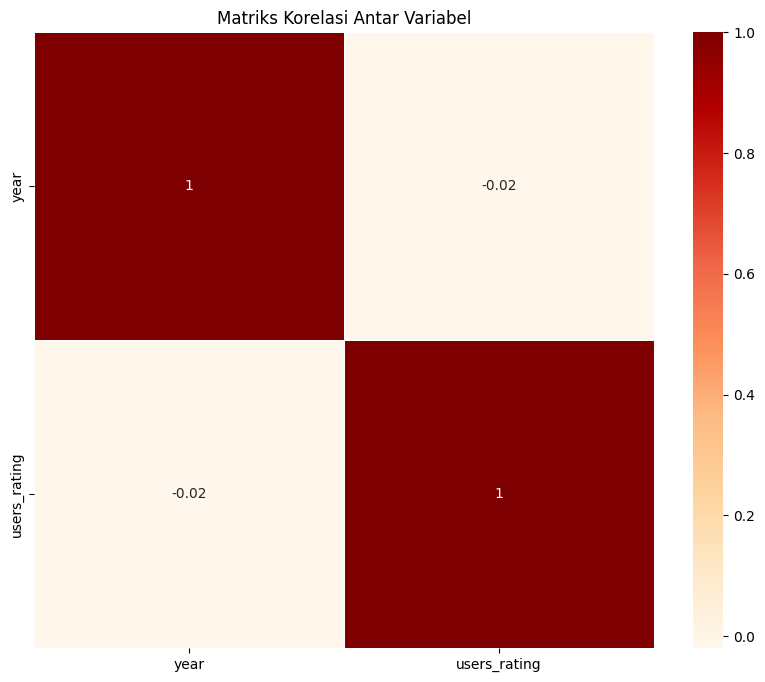

In [ ]:
# Matriks Korelasi
plt.figure(figsize=(10, 8))
numeric_df = df_file.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='OrRd', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# INSIGHT

1. Film Indonesia lebih banyak diproduksi dan mendapat rating setelah tahun 2000, terutama meningkat pesat setelah 2010 dan Genre drama, komedi, dan adventure cenderung memiliki rating lebih stabil di angka tinggi
2. Bahasa Indonesia menjadi yang paling banyak digunakan karena memang pasar utama film-film ini adalah penonton domestik (orang Indonesia).
3. Age Rating terbanyak di 13+ dan PG-13, yang menunjukkan bahwa target utama film adalah remaja dan dewasa.



## **Multivariat**

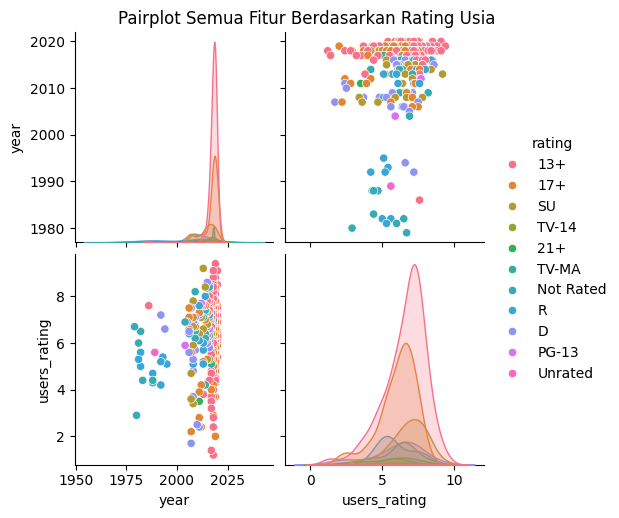

In [ ]:
# Pairplot antar fitur numerik dengan hue berdasarkan rating usia
selected_cols = ['year', 'users_rating', 'votes', 'runtime', 'rating']

sns.pairplot(df[selected_cols], hue='rating')
plt.suptitle("Pairplot Semua Fitur Berdasarkan Rating Usia", y=1.02)
plt.show()

##INSIGHT

1. Sebagian besar film dalam dataset dirilis antara tahun 2000 hingga 2020, dengan puncak produksi di sekitar tahun 2010-an.
2. Users_rating film cenderung berada di kisaran angka 6 hingga 8.
3. Film dengan kategori usia 13+ dan 17+ menjadi yang paling dominan dalam dataset, menunjukkan target pasar utama adalah remaja dan usia muda.

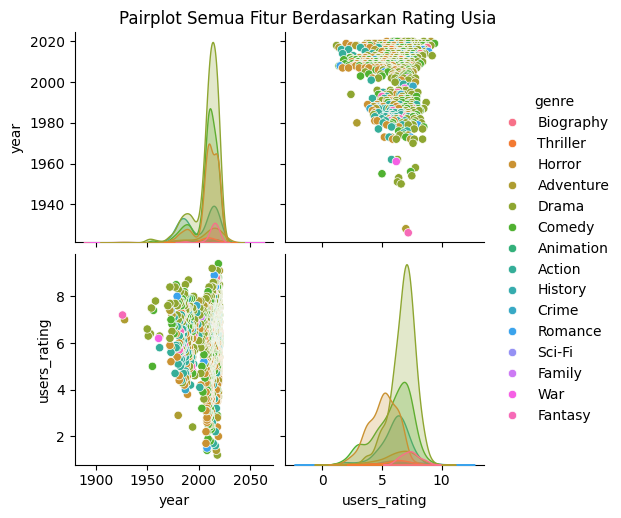

In [ ]:
# Pairplot antar fitur numerik dengan hue berdasarkan genre
selected_cols = ['year', 'users_rating', 'votes', 'runtime', 'genre']

sns.pairplot(df_file[selected_cols], hue='genre')
plt.suptitle("Pairplot Semua Fitur Berdasarkan Rating Usia", y=1.02)
plt.show()

##INSIGHT

1. Genre Drama, Action, dan Comedy mendominasi jumlah film, terlihat dari sebarannya yang padat.
2. Genre Horror dan Thriller memiliki variasi users_rating yang lebih beragam dibandingkan genre lain.
3. Sedikit film dari genre Biography, War, dan Fantasy, sehingga persebarannya tampak lebih tersebar dan tidak terpusat.

# Data Preparation

## Penanganan Missing Values

In [ ]:
df = df.dropna(subset=['users_rating', 'runtime', 'rating'])

## Feature Engineering

In [ ]:
# Preprocess runtime: remove ' min' and convert to float
if df['runtime'].dtype == 'object':
    df['runtime'] = df['runtime'].str.replace(' min', '', regex=False)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Preprocess votes: remove comma and convert to int
if df['votes'].dtype == 'object':
    df['votes'] = df['votes'].str.replace(',', '', regex=False)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Drop rows with invalid runtime or votes after coercion
df.dropna(subset=['runtime', 'votes'], inplace=True)

# Feature Engineering (log_votes and is_recent)
# Ensure 'votes' is numeric before applying log1p (redundant if steps above work, but safe)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce') # Ensure numeric after cleaning
df['log_votes'] = np.log1p(df['votes'])

df['is_recent'] = (df['year'] >= 2015).astype(int)

/tmp/ipython-input-26-4097333631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
/tmp/ipython-input-26-4097333631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
/tmp/ipython-input-26-4097333631.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Baris dengan missing values pada fitur-fitur penting dihapus untuk menjaga integritas data.

### Encoding Fitur Kategorikal

In [ ]:
# Encoding Categorical Features
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
df['languages'] = le.fit_transform(df['languages'])
df['rating'] = le.fit_transform(df['rating'])


/tmp/ipython-input-27-3980302568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = le.fit_transform(df['genre'])
/tmp/ipython-input-27-3980302568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['languages'] = le.fit_transform(df['languages'])
/tmp/ipython-input-27-3980302568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Karena model machine learning hanya menerima input numerik, kolom kategorikal seperti genre, languages, dan rating perlu dikonversi menjadi angka.

### Pemisahan Fitur dan Target

In [ ]:
# Pemisahan Fitur dan Target
X = df[['year', 'runtime', 'votes', 'log_votes', 'genre', 'languages', 'rating', 'is_recent']]
y = df['users_rating']

### Split Data Training dan Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data dibagi menjadi data latih dan data uji  80% – 20% untuk evaluasi yang adil terhadap performa model.

# Modelling

In [ ]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
}

In [ ]:
# GridSearchCV Setup and Fitting
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("GridSearchCV completed.")
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV completed.
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


# Evaluation


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Performance on Test Set:
  MSE: 1.6965
  R² Score: 0.2493


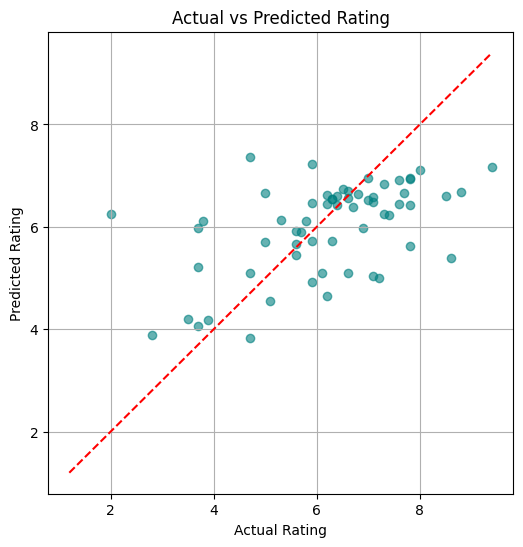

In [ ]:
y_pred = best_model.predict(X_test)

print("\nBest Parameters:", grid_search.best_params_)
print(f"Best Model Performance on Test Set:")
print(f"  MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"  R² Score: {r2_score(y_test, y_pred):.4f}")

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Rating')
plt.grid(True)
plt.show()